In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [59]:
pd.set_option('display.max_columns', None)

## Reading the data

In [60]:
cat = pd.read_csv('categorical.csv')

In [61]:
num = pd.read_csv('numerical.csv')

In [62]:
target = pd.read_csv('target.csv')

In [63]:
cat.shape

(95412, 22)

In [64]:
num.shape

(95412, 315)

In [65]:
target.shape

(95412, 2)

In [66]:
target.nunique(dropna=False)

TARGET_B     2
TARGET_D    71
dtype: int64

In [67]:
target['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [68]:
target['TARGET_D'] 

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
95407     0.0
95408     0.0
95409     0.0
95410    18.0
95411     0.0
Name: TARGET_D, Length: 95412, dtype: float64

C:\Users\31612\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


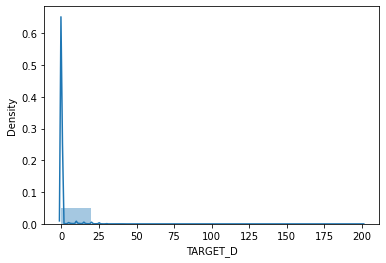

In [69]:
sns.distplot(target['TARGET_D'], bins=10);

### Checking for missing values

In [70]:
nulls_percent_num= pd.DataFrame(num.isna().sum()/len(num)).reset_index()
nulls_percent_num.columns = ['column_name', 'nulls_percentage']
nulls_percent_num

,column_name,nulls_percentage
0,TCODE,0.0
1,AGE,0.0
2,INCOME,0.0
3,WEALTH1,0.0
4,HIT,0.0
...,...,...
310,AVGGIFT,0.0
311,CONTROLN,0.0
312,HPHONE_D,0.0
313,RFA_2F,0.0


In [71]:
nulls_percent_num[nulls_percent_num['nulls_percentage']!=0]

,column_name,nulls_percentage


In [72]:
nulls_percent_cat= pd.DataFrame(num.isna().sum()/len(num)).reset_index()
nulls_percent_cat.columns = ['column_name', 'nulls_percentage']
nulls_percent_cat

,column_name,nulls_percentage
0,TCODE,0.0
1,AGE,0.0
2,INCOME,0.0
3,WEALTH1,0.0
4,HIT,0.0
...,...,...
310,AVGGIFT,0.0
311,CONTROLN,0.0
312,HPHONE_D,0.0
313,RFA_2F,0.0


In [73]:
nulls_percent_cat[nulls_percent_cat['nulls_percentage']!=0]

,column_name,nulls_percentage


In [74]:
num.isna().value_counts

<bound method DataFrame.value_counts of        TCODE    AGE  INCOME  WEALTH1    HIT  MALEMILI  MALEVET  VIETVETS  \
0      False  False   False    False  False     False    False     False   
1      False  False   False    False  False     False    False     False   
2      False  False   False    False  False     False    False     False   
3      False  False   False    False  False     False    False     False   
4      False  False   False    False  False     False    False     False   
...      ...    ...     ...      ...    ...       ...      ...       ...   
95407  False  False   False    False  False     False    False     False   
95408  False  False   False    False  False     False    False     False   
95409  False  False   False    False  False     False    False     False   
95410  False  False   False    False  False     False    False     False   
95411  False  False   False    False  False     False    False     False   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WE

In [75]:
np.where(pd.isnull(num))

(array([], dtype=int64), array([], dtype=int64))

In [76]:
np.where(num.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

## Dummifying the categorical data

In [77]:
cat.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [78]:
cat.nunique(dropna=False)

STATE           12
CLUSTER         53
HOMEOWNR         2
GENDER           3
DATASRCE         3
RFA_2R           1
RFA_2A           4
GEOCODE2         4
DOMAIN_A         5
DOMAIN_B         4
ODATEW_YR       15
ODATEW_MM       12
DOB_YR          96
DOB_MM          12
MINRDATE_YR     20
MINRDATE_MM     12
MAXRDATE_YR     18
MAXRDATE_MM     12
LASTDATE_YR      3
LASTDATE_MM     12
FIRSTDATE_YR    26
FIRSTDATE_MM    12
dtype: int64

In [79]:
cat[ 'STATE'].unique()

array(['IL', 'CA', 'NC', 'FL', 'other', 'IN', 'MI', 'MO', 'TX', 'WA',
       'WI', 'GA'], dtype=object)

In [80]:
cat[ 'HOMEOWNR'].value_counts()

H    74582
U    20830
Name: HOMEOWNR, dtype: int64

In [81]:
cat[ 'GENDER'].unique()

array(['F', 'M', 'other'], dtype=object)

In [82]:
cat[ 'RFA_2R'].unique() #we drop this column.

array(['L'], dtype=object)

In [83]:
cat[ 'RFA_2A'].unique()

array(['E', 'G', 'F', 'D'], dtype=object)

In [84]:
cat[ 'GEOCODE2'].unique()

array(['C', 'A', 'D', 'B'], dtype=object)

In [85]:
cat[ 'DOMAIN_A'].unique()

array(['T', 'S', 'R', 'U', 'C'], dtype=object)

In [86]:
cat[['STATE','HOMEOWNR','GENDER', 'GEOCODE2', 'RFA_2A', 'DOMAIN_A']]


,STATE,HOMEOWNR,GENDER,GEOCODE2,RFA_2A,DOMAIN_A
0,IL,H,F,C,E,T
1,CA,H,M,A,G,S
2,NC,U,M,C,E,R
3,CA,U,F,C,E,R
4,FL,H,F,A,F,S
...,...,...,...,...,...,...
95407,other,H,M,C,G,C
95408,TX,H,M,A,F,C
95409,MI,H,M,B,E,C
95410,CA,H,F,A,F,C


In [87]:
encoder0 = OneHotEncoder()

encoder0.fit(cat[['STATE']])
col_transf0 = encoder0.transform(cat[['STATE']]).toarray()
STATE = pd.DataFrame(col_transf0, columns=encoder0.categories_[0], dtype=int)
STATE

,CA,FL,GA,IL,IN,MI,MO,NC,TX,WA,WI,other
0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,1
95408,0,0,0,0,0,0,0,0,1,0,0,0
95409,0,0,0,0,0,1,0,0,0,0,0,0
95410,1,0,0,0,0,0,0,0,0,0,0,0


In [88]:
encoder = OneHotEncoder()
type(encoder)

sklearn.preprocessing._encoders.OneHotEncoder

In [89]:
encoder.fit(cat[['HOMEOWNR']])

OneHotEncoder()

In [90]:
encoder.categories_[0]

array(['H', 'U'], dtype=object)

In [91]:
col_transf = encoder.transform(cat[['HOMEOWNR']]).toarray()
col_transf

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [92]:
col_transf.shape

(95412, 2)

In [93]:
len(encoder.categories_[0])

2

In [94]:
HOMEOWNR = pd.DataFrame(col_transf, columns=encoder.categories_[0], dtype=int)
HOMEOWNR

,H,U
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
95407,1,0
95408,1,0
95409,1,0
95410,1,0


In [95]:
encoder1 = OneHotEncoder()
type(encoder1)

sklearn.preprocessing._encoders.OneHotEncoder

In [96]:
encoder1.fit(cat[['GENDER']])

OneHotEncoder()

In [97]:
col_transf1 = encoder1.transform(cat[['GENDER']]).toarray()
col_transf1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [98]:
GENDER = pd.DataFrame(col_transf1, columns=encoder1.categories_[0], dtype=int)
GENDER

,F,M,other
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
95407,0,1,0
95408,0,1,0
95409,0,1,0
95410,1,0,0


In [99]:
encoder2 = OneHotEncoder()

encoder2.fit(cat[['GEOCODE2']])
col_transf2 = encoder2.transform(cat[['GEOCODE2']]).toarray()
GEOCODE2 = pd.DataFrame(col_transf2, columns=encoder2.categories_[0], dtype=int)
GEOCODE2





,A,B,C,D
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
95407,0,0,1,0
95408,1,0,0,0
95409,0,1,0,0
95410,1,0,0,0


In [100]:
encoder3 = OneHotEncoder()

encoder3.fit(cat[['RFA_2A']])
col_transf3 = encoder3.transform(cat[['RFA_2A']]).toarray()

RFA_2A = pd.DataFrame(col_transf3, columns=encoder3.categories_[0], dtype=int)
RFA_2A


,D,E,F,G
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
95407,0,0,0,1
95408,0,0,1,0
95409,0,1,0,0
95410,0,0,1,0


In [101]:
encoder4 = OneHotEncoder()

encoder4.fit(cat[['DOMAIN_A']])
col_transf4 = encoder4.transform(cat[['DOMAIN_A']]).toarray()
DOMAIN_A = pd.DataFrame(col_transf4, columns=encoder4.categories_[0], dtype=int)
DOMAIN_A


,C,R,S,T,U
0,0,0,0,1,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
95407,1,0,0,0,0
95408,1,0,0,0,0
95409,1,0,0,0,0
95410,1,0,0,0,0


In [102]:
cat_encod = pd.concat([STATE,HOMEOWNR,GENDER,GEOCODE2,RFA_2A,DOMAIN_A], axis = 1)

In [103]:
cat_encod.shape

(95412, 30)

In [104]:
cat_encod.head()

,CA,FL,GA,IL,IN,MI,MO,NC,TX,WA,WI,other,H,U,F,M,other,A,B,C,D,D,E,F,G,C,R,S,T,U
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [105]:
cat.drop(['STATE','HOMEOWNR','GENDER','GEOCODE2','RFA_2A','DOMAIN_A', 'RFA_2R'], axis = 1, inplace= True)

In [106]:
cat.head()

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11
1,14,3,1,94,1,52,2,93,10,95,12,95,12,93,10
2,43,3,2,90,1,0,2,91,11,92,7,95,12,90,1
3,44,3,2,87,1,28,1,87,11,94,11,95,12,87,2
4,16,3,2,86,1,20,1,93,10,96,1,96,1,79,3


In [108]:
cat = pd.concat([cat, cat_encod], axis = 1)

In [109]:
cat.shape

(95412, 75)

## Train-test split

In [110]:
data = pd.concat([cat, num, target], axis = 1)

In [111]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = X.columns
X_test.columns = X.columns

## Upsampling to correct the class imbalance in TARGET_B

We apply upsampling to the train set. 

In [119]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_SMOTE, y_train_SMOTE)

print(X_train_SMOTE.shape)
print(y_train_SMOTE.shape)


(135940, 391)
(135940,)


In [121]:
y_train.value_counts()

0    67970
1     3589
Name: TARGET_B, dtype: int64

In [115]:
y_train_SMOTE.value_counts()

0    67970
1    67970
Name: TARGET_B, dtype: int64

## Applying the random forest classifier

In [116]:
X_train = pd.DataFrame(X_train_SMOTE)
X_test = pd.DataFrame(X_test)


y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target d from the set of features
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train, y_train_SMOTE)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train,  y_train_SMOTE)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

The R2 for the Random Forest in the TRAIN set is 0.90
The R2 for the Random Forest in the TEST  set is 0.88


0    22599
1     1254
Name: TARGET_B, dtype: int64

array([[20708,  1891],
       [ 1061,   193]], dtype=int64)

In [ ]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8)

cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

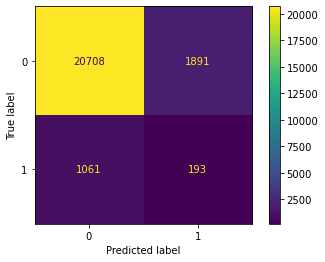

In [132]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [134]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8)

cross_val_scores = cross_val_score(clf, X_train_SMOTE, y_train_SMOTE, cv=10)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean R2 of the folds was 0.99


In [135]:
cross_val_scores

array([0.89995586, 0.99830808, 0.99801383, 0.9969104 , 0.99558629,
       0.99330587, 0.9984552 , 0.99771958, 0.99462998, 0.99852876])